In [155]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [156]:
ff1.Cache.enable_cache('cache') 

In [157]:
year = 2021
circuit = 'Austrian'

# Load the session data
race = ff1.get_session(year, circuit, 'R')
laps = race.load_laps(with_telemetry=True)

/home/andraade/.local/lib/python3.8/site-packages/fastf1/core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Austrian Grand Prix - Race [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16'

In [158]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [159]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [160]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
    'UNKNOWN': '#000000',
    'ULTRASOFT': '#FFCBDB',
    'SUPERSOFT': '#f308d8'
}

  Driver  Stint Compound  StintLength
0    ALO    1.0   MEDIUM           32
1    ALO    2.0     HARD           38
   Driver  Stint Compound  StintLength
24    OCO    1.0   MEDIUM            1
   Driver  Stint Compound  StintLength
22    NOR    1.0   MEDIUM           30
23    NOR    2.0     HARD           41
   Driver  Stint Compound  StintLength
29    RIC    1.0   MEDIUM           29
30    RIC    2.0     HARD           42
   Driver  Stint Compound  StintLength
20    MSC    1.0   MEDIUM           34
21    MSC    2.0     HARD           35
   Driver  Stint Compound  StintLength
31    RUS    1.0   MEDIUM           30
32    RUS    2.0     HARD           40
   Driver  Stint Compound  StintLength
17    MAZ    1.0   MEDIUM           27
18    MAZ    2.0     HARD           18
19    MAZ    3.0     HARD           24
   Driver  Stint Compound  StintLength
15    LEC    1.0   MEDIUM           34
16    LEC    2.0     HARD           37
   Driver  Stint Compound  StintLength
33    SAI    1.0     HARD   

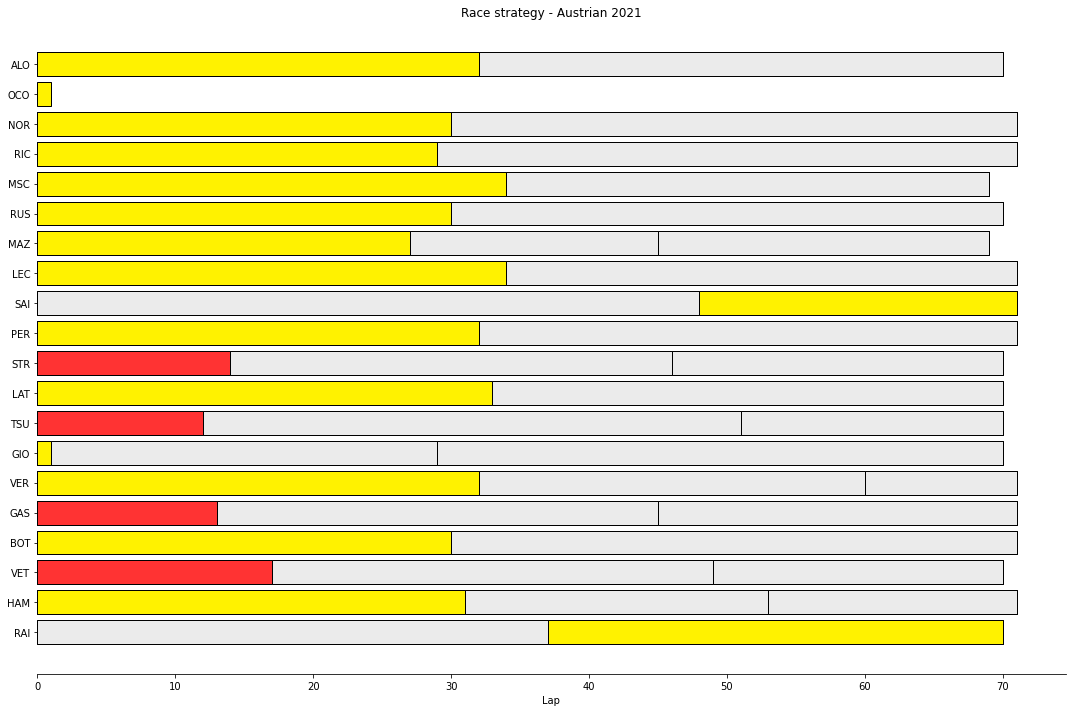

In [161]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in driver_stints['Driver']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    print(stints)
    
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver], 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']
        
# Set title
plt.title(f'Race strategy - {circuit} {year}')
        
# Set x-label
plt.xlabel('Lap')

# Invert y-axis 
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig(f'strategy_{circuit}_{year}.png', dpi=300)

plt.show()